In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/perch.csv')
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
x_train,x_test,y_train,y_test = train_test_split(df, perch_weight, test_size=0.3, random_state=20)

poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train), ridge.score(test_scaled, y_test))

0.9850524561894105 0.9872837481235449


In [4]:
# 규제 알고리즘: 릿지
# 적절한 규제강도 찾기
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100]
ridge = Ridge(alpha=0.001)
ridge.fit(train_scaled, y_train)
ridge.score(train_scaled, y_train), ridge.score(test_scaled, y_test)

(0.9895661491241238, 0.9876644249313629)

In [2]:
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100]
train_score, test_score = [], []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

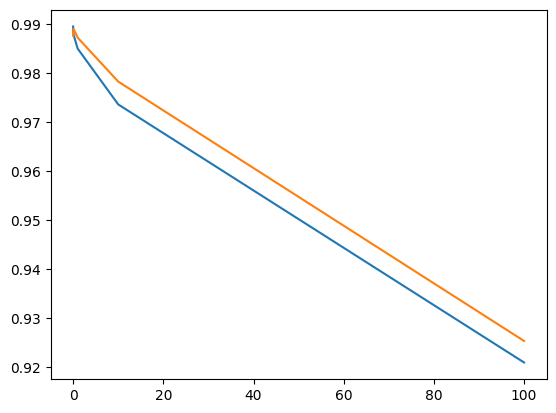

In [3]:
import matplotlib.pyplot as plt
plt.plot(alphas, train_score)
plt.plot(alphas, test_score)

In [5]:
ridge = Ridge(alpha=1.5)
ridge.fit(train_scaled, y_train)
ridge.score(train_scaled, y_train), ridge.score(test_scaled, y_test)

(0.9835664446481203, 0.9861368975403845)

In [6]:
from sklearn.linear_model import Lasso

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23278.69151927898, tolerance: 400.6605378974359
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21438.091175313777, tolerance: 400.6605378974359
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3671.779438304169, tolerance: 400.6605378974359
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_

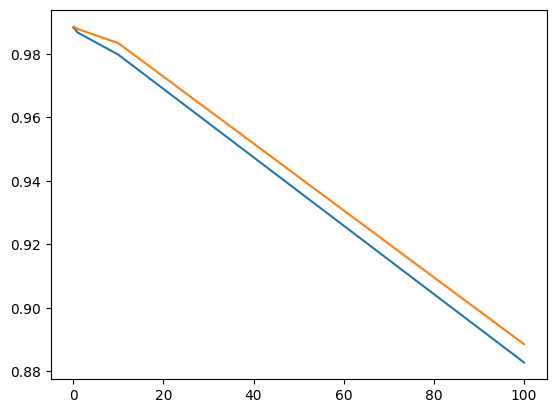

In [7]:
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100]
train_score, test_score = [], []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))
plt.plot(alphas, train_score)
plt.plot(alphas, test_score)

In [8]:
lasso = Lasso(alpha=alpha)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.8827923173125317
0.8885535657768276


### 다중회귀: 여러개의 특성(다항)을 사용하는 선형회귀
### 특성공학: 특성을 조합해서 새로운 특성을 만드는 과정
### 릿지: 오차(계수)의 제곱의 평균이 작아지도록
### 라쏘: 오차(계수)의 절대값이 작아지도록
### 하이퍼파라미터: 직접 수치를 조정해서 성능향상을 유도하는 매개변수들

# 다양한 분류 알고리즘

In [9]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/fish_data_more.csv'
df = pd.read_csv(url)

In [10]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [11]:
# 지도 학습 독립변수 / 종속변수
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [13]:
X.shape, Y.shape

((159, 5), (159,))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=42)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((111, 5), (111,), (48, 5), (48,))

In [16]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)
print(kn.score(x_train, y_train))
print(kn.score(x_test, y_test))

0.8648648648648649
0.8541666666666666


C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [20]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [21]:
kn.predict(x_test[:5])

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [22]:
kn.predict_proba(x_test[:5])

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

In [23]:
_, indexes = kn.kneighbors(x_test[[3]])

In [24]:
y_train.values[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

### 회귀인데 분류 모델인 로지스틱회귀
### 로지스틱회귀는 값을 예측하지만 내부에 시그모이드 함수를 적용해서 결과를 0~1 사이의 값으로 반환하고 그 값을 기본임계치인 0.5를 적용해서 0.5보다 크면 양성클래스이고 그렇지 않으면 음성 클래스
### 결국은 이진분류다

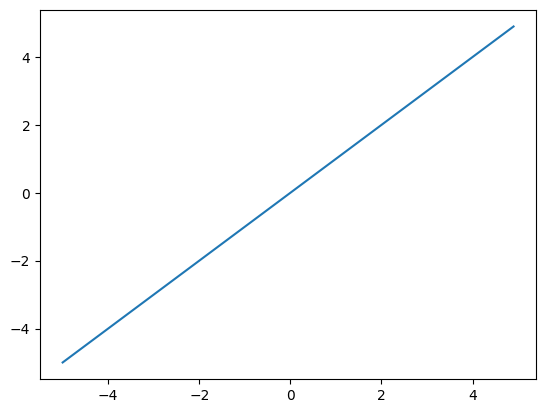

In [25]:
# sigmoid(logistic) 함수
z = np.arange(-5,5,0.1)
plt.plot(z,z)  

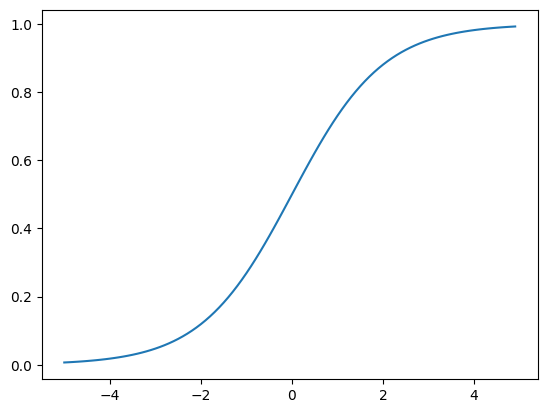

In [27]:
def mysigmoid(z):
    y = 1 / (1 + np.exp(-z))
    return y
y = mysigmoid(z)
plt.plot(z, y)

# 이진분류 작업

In [29]:
binary_indexes = (y_train == 'Bream') | (y_train == 'Smelt')

In [32]:
x = x_train[binary_indexes]
y = y_train[binary_indexes]

In [33]:
x.shape, y.shape

((30, 5), (30,))

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [35]:
lr.predict(x[:5]), y[:5].values

C:\Temp\ipykernel_49492\1920793428.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lr.predict(x[:5]), y[:5].values


(array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object),
 array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object))

In [36]:
lr.predict_proba(x[:5])

array([[9.84692895e-01, 1.53071052e-02],
       [9.97395276e-01, 2.60472443e-03],
       [3.60400304e-02, 9.63959970e-01],
       [9.71703204e-01, 2.82967960e-02],
       [9.99457341e-01, 5.42659465e-04]])

In [37]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [38]:
lr.decision_function(x[:5])

array([-4.1640127 , -5.94782027,  3.28641949, -3.53630183, -7.51848576])

In [43]:
mysigmoid(lr.decision_function(x[:5]))

array([1.53071052e-02, 2.60472443e-03, 9.63959970e-01, 2.82967960e-02,
       5.42659465e-04])

In [40]:
# sigmoid 함수를 구현한 라이브러리
from scipy.special import expit

In [41]:
expit(lr.decision_function(x[:5]))

array([1.53071052e-02, 2.60472443e-03, 9.63959970e-01, 2.82967960e-02,
       5.42659465e-04])

# 로지스틱 회귀로 다중 분류
    로지스틱 회귀는 기본적으로 반복학습: 기본값이 100
    규제 알고리즘을 적용: L2규제(Ridge)를 제어하는 매개변수가 C가 alpha처럼 규제강도인데 반대이다
    C가 작을수록 규제 강도가 커진다 기본이 1

In [44]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [46]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.9279279279279279, 0.9375)

In [48]:
lr.predict(x_test[:5]), y_test[:5].values

C:\Temp\ipykernel_49492\3233308327.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lr.predict(x_test[:5]), y_test[:5].values


(array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object),
 array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object))

In [49]:
lr.predict_proba(x_test[:5])

array([[9.54599368e-06, 1.45949896e-02, 8.30492577e-01, 3.06536806e-04,
        1.43601150e-01, 8.06317056e-03, 2.93203011e-03],
       [1.18456968e-08, 3.06751081e-03, 5.30780179e-02, 3.23780004e-05,
        6.13369999e-03, 9.37680260e-01, 8.12180785e-06],
       [3.32264381e-05, 4.70652790e-06, 3.80752450e-02, 9.29984713e-01,
        1.42213281e-02, 1.76326460e-02, 4.81347183e-05],
       [1.14057114e-02, 3.33227027e-02, 3.42054421e-01, 6.82922502e-03,
        5.31727609e-01, 9.79419666e-05, 7.45623888e-02],
       [7.36007640e-06, 5.25927245e-04, 8.87324575e-01, 2.50307672e-03,
        1.04769002e-01, 3.06138509e-03, 1.80867365e-03]])

In [50]:
# 다중분류일 때 선형방정식의 모양
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

### 이진분류에서 사용했던 Z를 7개 계산
### 다중분류는 클래스마다 Z값을 계산한다
### 가장높은 Z값을 가지는 클래스가 예측한 클래스이다
### 소프트맥스 함수를 이용해서 7개의 Z값을 확률로 변환한다

### 이진분류일때는 Z값을 sigmoid max함수를 적용해서 확률로 변환
### 다중분류일때는 class 개수만큼 Z값을 구하고 그 Z값을 softmax함수를 적용해서 확률로 변환